In [1]:
import data_provider as dp
import signal_generator as sig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:
data = dp.get_ohlcv(start_date='2023-01-01', end_date='2025-01-01')
signals = sig.MACD(data['close'], signal_window=3)

signals
# signals[signals['signal'] != 0]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,close,macd,signal_line,signal,buy_signal,sell_signal
0,16625.080078,0.000000,0.000000,0.0,0,0
1,16688.470703,5.056802,2.528401,1.0,1,0
2,16679.857422,8.273957,5.401179,0.0,0,0
3,16863.238281,25.328903,15.365041,0.0,0,0
4,16836.736328,36.288275,25.826658,0.0,0,0
...,...,...,...,...,...,...
726,94164.859375,252.545647,542.889684,0.0,0,0
727,95163.929688,41.713616,292.301650,0.0,0,0
728,93530.226562,-254.267439,19.017106,0.0,0,0
729,92643.210938,-554.022875,-267.502885,0.0,0,0


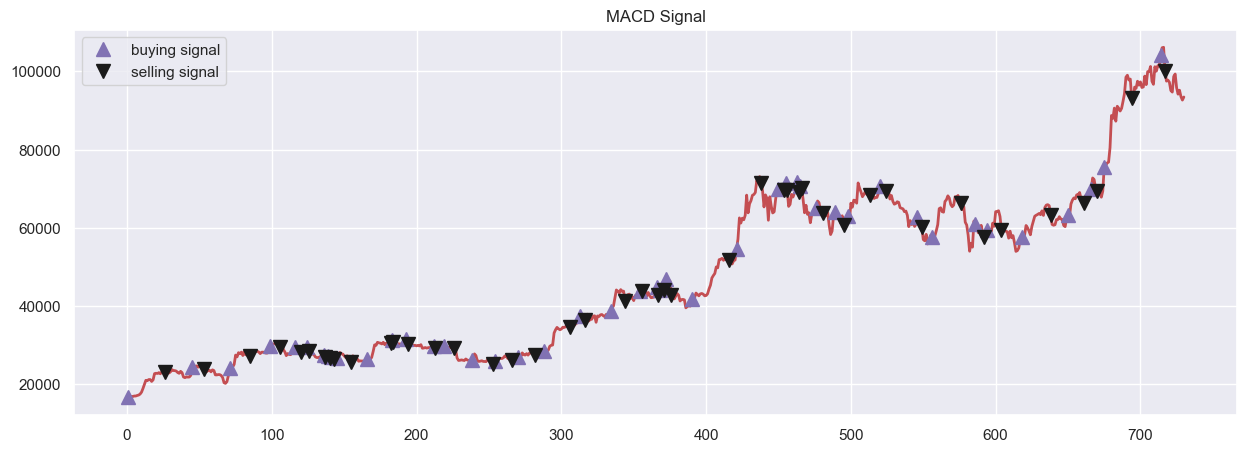

In [ ]:
buy_indices = signals.index[signals['buy_signal'] == 1].tolist()
sell_indices = signals.index[signals['sell_signal'] == 1].tolist()

fig = plt.figure(figsize = (15,5))
plt.plot(signals['close'], color='r', lw=2.)
plt.plot(signals['close'], '^', markersize=10, color='m', label = 'buying signal', markevery = buy_indices)
plt.plot(signals['close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = sell_indices)
plt.title('MACD Signal')
plt.legend()
plt.show()

In [5]:
import signal_classifier as sc

signal_indices = signals.index[signals['signal'] != 0].tolist()

signals['score'] = 0
for i in signal_indices:
    score = sc.classify_signal(i, signals)
    signals.loc[i, 'score'] = score

In [6]:
len(signals.loc[0:40, 'buy_signal'])

41

In [7]:
from collections import Counter
Counter(signals['score'])

Counter({0: 679, 1: 49, -2: 3})

In [10]:
signals['final_signal'] = signals['signal'][signals['score'] > 0]

# Buy / Sell signals
signals['final_buy_signal'] = 0
signals['final_sell_signal'] = 0
signals.loc[signals['final_signal'] == 1, 'final_buy_signal'] = 1
signals.loc[signals['final_signal'] == -1, 'final_sell_signal'] = 1

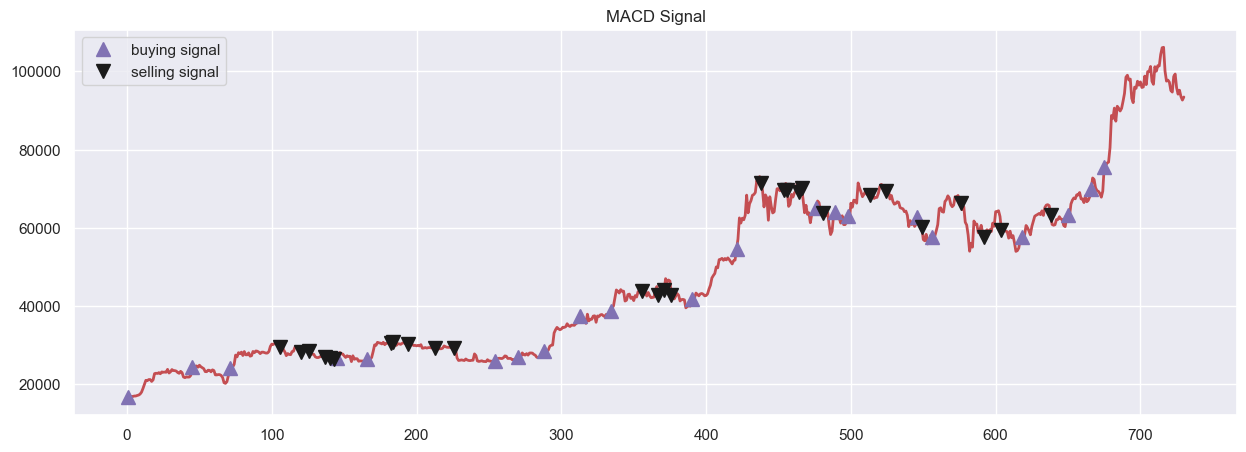

In [11]:
buy_indices = signals.index[signals['final_buy_signal'] == 1].tolist()
sell_indices = signals.index[signals['final_sell_signal'] == 1].tolist()

fig = plt.figure(figsize = (15,5))
plt.plot(signals['close'], color='r', lw=2.)
plt.plot(signals['close'], '^', markersize=10, color='m', label = 'buying signal', markevery = buy_indices)
plt.plot(signals['close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = sell_indices)
plt.title('MACD Signal')
plt.legend()
plt.show()